In [30]:
#Import the requests library
import requests

#Import the API key
from config import weather_api_key

#Import the datetime module from the datetime library
from datetime import datetime

# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [31]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [32]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ff3ead26fa733ab5a792ef6f3221a1ed


In [33]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [35]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [36]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

cockburn town tc
gat ly
parvatsar in
punta arenas cl
saint george bm


In [37]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [38]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [39]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [40]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [45]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 2 of Set 25 | bluff
Processing Record 3 of Set 25 | hanna
Processing Record 4 of Set 25 | fairbanks
Processing Record 5 of Set 25 | port elizabeth
Processing Record 6 of Set 25 | margate
Processing Record 7 of Set 25 | barrow
Processing Record 8 of Set 25 | rikitea
Processing Record 9 of Set 25 | busselton
Processing Record 10 of Set 25 | avarua
Processing Record 11 of Set 25 | magnor
Processing Record 12 of Set 25 | maitum
Processing Record 13 of Set 25 | noumea
Processing Record 14 of Set 25 | lakatoro
Processing Record 15 of Set 25 | carnarvon
Processing Record 16 of Set 25 | faya
Processing Record 17 of Set 25 | barentsburg
City not found. Skipping...
Processing Record 18 of Set 25 | umzimvubu
City not found. Skipping...
Processing Record 19 of Set 25 | jamestown
Processing Record 20 of Set 25 | bethel
Processing Record 21 of Set 25 | yashan
Processing Record 22 of Set 25 | maltahohe
Processing Record 23 of Set 25 | kidal
Processing Record 24 of Set 25 | new norfo

Processing Record 35 of Set 28 | thompson
Processing Record 36 of Set 28 | pevek
Processing Record 37 of Set 28 | kodinsk
Processing Record 38 of Set 28 | anloga
Processing Record 39 of Set 28 | kavaratti
Processing Record 40 of Set 28 | bondoukou
Processing Record 41 of Set 28 | haines junction
Processing Record 42 of Set 28 | ayorou
Processing Record 43 of Set 28 | attawapiskat
City not found. Skipping...
Processing Record 44 of Set 28 | fukue
Processing Record 45 of Set 28 | georgetown
Processing Record 46 of Set 28 | tura
Processing Record 47 of Set 28 | hornepayne
Processing Record 48 of Set 28 | embonas
Processing Record 49 of Set 28 | nsanje
Processing Record 50 of Set 28 | clearwater
Processing Record 1 of Set 29 | port macquarie
Processing Record 2 of Set 29 | saint-philippe
Processing Record 3 of Set 29 | san jose
Processing Record 4 of Set 29 | arraial do cabo
Processing Record 5 of Set 29 | isangel
Processing Record 6 of Set 29 | ankazobe
Processing Record 7 of Set 29 | bal

Processing Record 20 of Set 32 | verkhniy rohachyk
Processing Record 21 of Set 32 | dipkarpaz
City not found. Skipping...
Processing Record 22 of Set 32 | verkhne-katunskoye
City not found. Skipping...
Processing Record 23 of Set 32 | yuzhnyy
Processing Record 24 of Set 32 | manakara
Processing Record 25 of Set 32 | vila franca do campo
Processing Record 26 of Set 32 | sentyabrskiy
City not found. Skipping...
Processing Record 27 of Set 32 | pechenga
Processing Record 28 of Set 32 | menongue
Processing Record 29 of Set 32 | lourdes
Processing Record 30 of Set 32 | moyale
Processing Record 31 of Set 32 | zaykovo
Processing Record 32 of Set 32 | semme
Processing Record 33 of Set 32 | nome
Processing Record 34 of Set 32 | oistins
Processing Record 35 of Set 32 | atakpame
Processing Record 36 of Set 32 | biltine
Processing Record 37 of Set 32 | san carlos de bariloche
Processing Record 38 of Set 32 | ferrol
Processing Record 39 of Set 32 | oussouye
Processing Record 40 of Set 32 | rusape
P

Processing Record 6 of Set 36 | honiara
Processing Record 7 of Set 36 | lipin bor
Processing Record 8 of Set 36 | itarema
Processing Record 9 of Set 36 | zemio
Processing Record 10 of Set 36 | namatanai
Processing Record 11 of Set 36 | tinjah
City not found. Skipping...
Processing Record 12 of Set 36 | bosaso
Processing Record 13 of Set 36 | batemans bay
Processing Record 14 of Set 36 | shevchenkove
Processing Record 15 of Set 36 | kitgum
Processing Record 16 of Set 36 | buala
Processing Record 17 of Set 36 | laplace
Processing Record 18 of Set 36 | dhali
Processing Record 19 of Set 36 | dwarka
Processing Record 20 of Set 36 | bitung
Processing Record 21 of Set 36 | notre-dame-du-lac
Processing Record 22 of Set 36 | jacareacanga
Processing Record 23 of Set 36 | central point
Processing Record 24 of Set 36 | russell
Processing Record 25 of Set 36 | isla mujeres
Processing Record 26 of Set 36 | wattegama
Processing Record 27 of Set 36 | kuala terengganu
Processing Record 28 of Set 36 | o

In [46]:
len(city_data)

557

In [56]:
#Convert the array of ddictionaries to a Pandas DataFraame 
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rio Gallegos,-51.62,-69.22,60.80,44,40,34.45,AR,2020-12-23 23:59:03
1,Bluff,-46.60,168.33,55.99,85,84,15.01,NZ,2020-12-24 00:00:50
2,Hanna,51.63,-111.90,21.99,70,100,5.99,CA,2020-12-24 00:00:09
3,Fairbanks,64.84,-147.72,17.01,85,90,4.70,US,2020-12-24 00:00:50
4,Port Elizabeth,-33.92,25.57,66.20,88,90,24.16,ZA,2020-12-24 00:00:51
5,Margate,51.38,1.39,46.99,83,64,1.99,GB,2020-12-24 00:00:51
6,Barrow,71.29,-156.79,-2.20,70,90,28.86,US,2020-12-23 23:58:29
7,Rikitea,-23.12,-134.97,78.57,63,37,5.97,PF,2020-12-24 00:00:51
8,Busselton,-33.65,115.33,81.41,31,16,6.98,AU,2020-12-24 00:00:51
9,Avarua,-21.21,-159.78,71.60,94,100,4.70,CK,2020-12-23 23:58:55


In [57]:
new_city_column =["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_city_column]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rio Gallegos,AR,2020-12-23 23:59:03,-51.62,-69.22,60.80,44,40,34.45
1,Bluff,NZ,2020-12-24 00:00:50,-46.60,168.33,55.99,85,84,15.01
2,Hanna,CA,2020-12-24 00:00:09,51.63,-111.90,21.99,70,100,5.99
3,Fairbanks,US,2020-12-24 00:00:50,64.84,-147.72,17.01,85,90,4.70
4,Port Elizabeth,ZA,2020-12-24 00:00:51,-33.92,25.57,66.20,88,90,24.16
5,Margate,GB,2020-12-24 00:00:51,51.38,1.39,46.99,83,64,1.99
6,Barrow,US,2020-12-23 23:58:29,71.29,-156.79,-2.20,70,90,28.86
7,Rikitea,PF,2020-12-24 00:00:51,-23.12,-134.97,78.57,63,37,5.97
8,Busselton,AU,2020-12-24 00:00:51,-33.65,115.33,81.41,31,16,6.98
9,Avarua,CK,2020-12-23 23:58:55,-21.21,-159.78,71.60,94,100,4.70


In [58]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [59]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [60]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1608780696.3265438

In [61]:
today = time.strftime("%x")
today

'12/23/20'

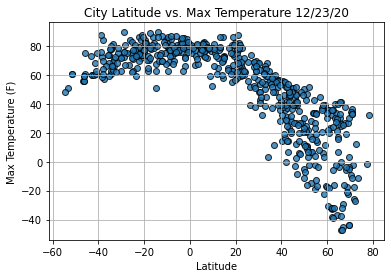

In [62]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

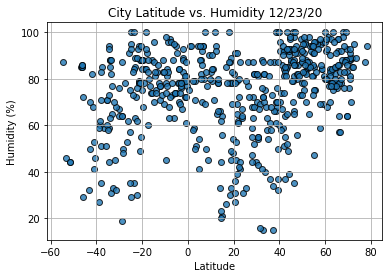

In [63]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

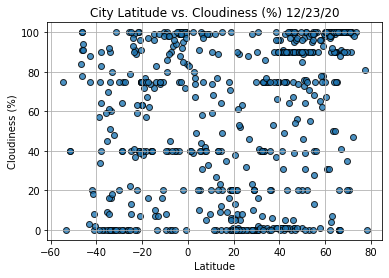

In [64]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

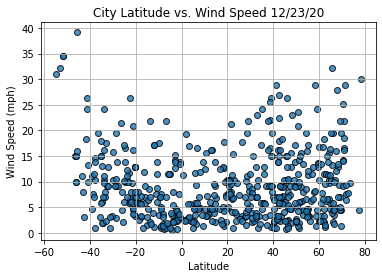

In [65]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()